Day with the most losses: 0, The count of losses: 17222
Top 5 daily APC losses: [17080 17093 17132 17170 17222]
Total APC losses in summer 2023: 809694
Average APC losses from day 100 to 500: 10644.0125


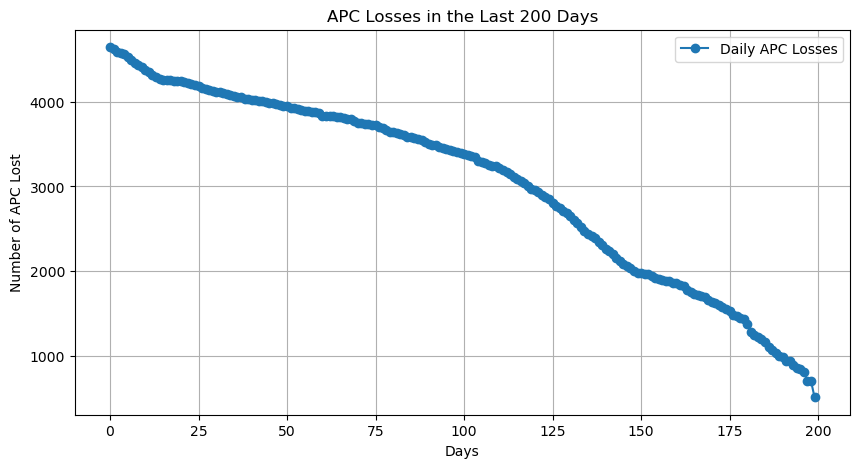

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

def read_column_as_numpy(filename, column_name):
    with open(filename, newline='', encoding='utf-8') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)
        column_index = headers.index(column_name)
        data = [row[column_index] for row in reader if row[column_index].isdigit()]
        return np.array(data, dtype=int)

def get_day(losses):
    max_loss_i = np.argmax(losses)
    max_loss_v = losses[max_loss_i]
    return max_loss_i, max_loss_v

# Назва файлу і стовпця
filename = 'russia_losses_equipment.csv'
column_name = 'APC'

# Зчитуємо дані про втрати БТР
apc_losses = read_column_as_numpy(filename, column_name)

day_with_max_losses, max_losses_v = get_day(apc_losses)
print(f"Day with the most losses: {day_with_max_losses}, The count of losses: {max_losses_v}")

daily_apc_losses = apc_losses

top_5_apc_losses = np.sort(daily_apc_losses)[-5:]
print("Top 5 daily APC losses:", top_5_apc_losses)

total_apc_losses_summer_2023 = np.sum(daily_apc_losses[700:])
print("Total APC losses in summer 2023:", total_apc_losses_summer_2023)

average_apc_losses_100_500_days = np.mean(daily_apc_losses[100:500])
print("Average APC losses from day 100 to 500:", average_apc_losses_100_500_days)

# Побудуємо графік для останніх 200 днів
plt.figure(figsize=(10, 5))
plt.plot(daily_apc_losses[-200:], linestyle='-', marker='o', label='Daily APC Losses')
plt.title('APC Losses in the Last 200 Days')
plt.xlabel('Days')
plt.ylabel('Number of APC Lost')
plt.grid(True)
plt.legend()
plt.show()
